## Desciption

Here, we are training a model to predict both the transcription initiation rate and the direction of transcription (forward or reverse). This model uses the same architecture as CNN_5_0, but uses augmented data that includes reversed complements.

This model predicts between -1 (reverse) and 1 (forward) with 0 being no transcription. It also uses CNN_6's preprocessing, where 1 is high TX, so -1 is highy TX (reversed) and 1 is highy TX (forward).

In [1]:
import CNN_7_0 as parent

In [2]:
name = 'CNN_7_0'

In [3]:
file_path = '../Data/Augmented/reverse_LaFleur_supp.csv'

df = parent.load_and_preprocess_data(file_path)

In [4]:
# Displays only the first and last row
df.iloc[[0, -1]]

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref),Reversed,Augmented Observed log(TX/Txref),Normalized Augmented Observed log(TX/Txref)
0,La Fleur et al (Fig 3a).csv,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.386326,False,-3.386326,0.248683
97526,De Novo Designs (Fig 5 b and c).csv,ATGGAACCTCGAAATTTGATCTTAAACAAAATTATTTGTAGAGGCT...,GAATTCTATTATAATATGCATAATAATAAATGTGTGATTATATTGT...,TGTTGGACCAAAACGAAAAAAGACGCTCGAAAGCGTCTCTTT,-6.734191,True,6.734191,-0.494541


In [5]:
df['File Name'].unique()

array(['La Fleur et al (Fig 3a).csv', 'Urtecho et al (Fig 3c, S7b).csv',
       'Hossain et al (Fig 3d, S7d).csv', 'Yu et al (Fig S3).csv',
       'Lagator 36N.csv', 'Lagator Pl.csv', 'Lagator Pr.csv',
       'Anderson Series (Fig 4c).csv',
       'De Novo Designs (Fig 5 b and c).csv'], dtype=object)

In [6]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [7]:
X.shape

(97527, 150, 4)

In [8]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0171 - val_loss: 0.0044
Epoch 2/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 3/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 4/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 5/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 6/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 7/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 8/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 9/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 10/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 11/150
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 12/1

3048/3048 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


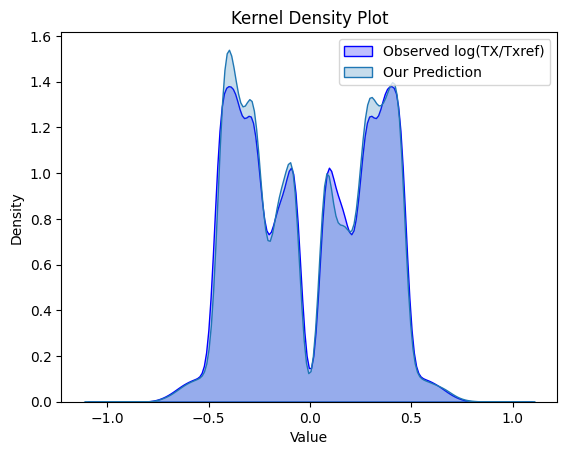

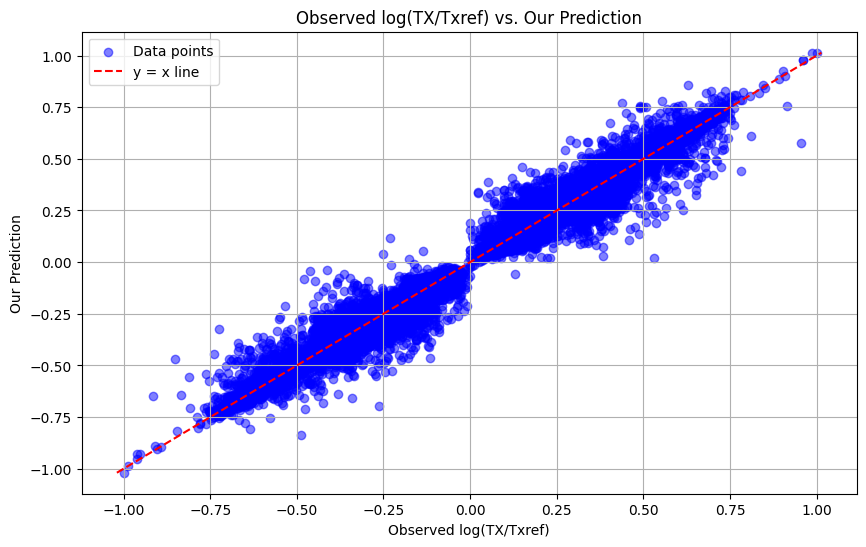

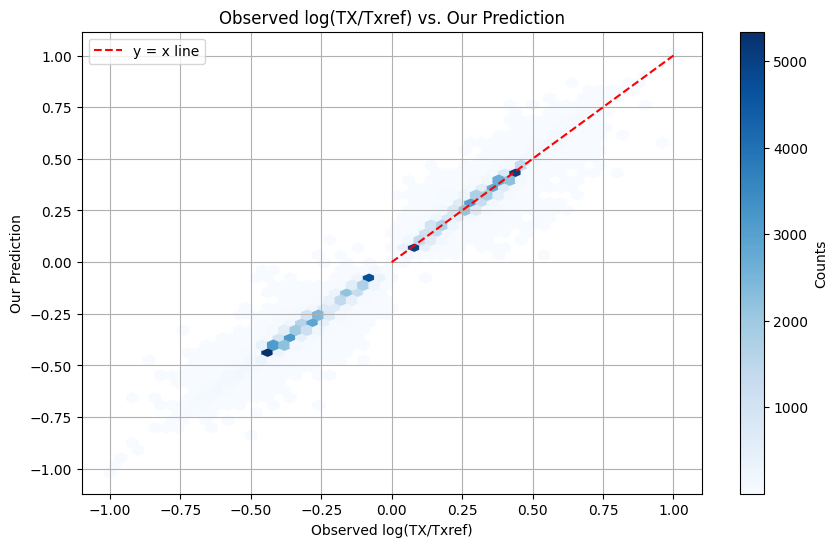

In [11]:
predicted = parent.load_and_predict(name, X)
observed = df['Normalized Augmented Observed log(TX/Txref)'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


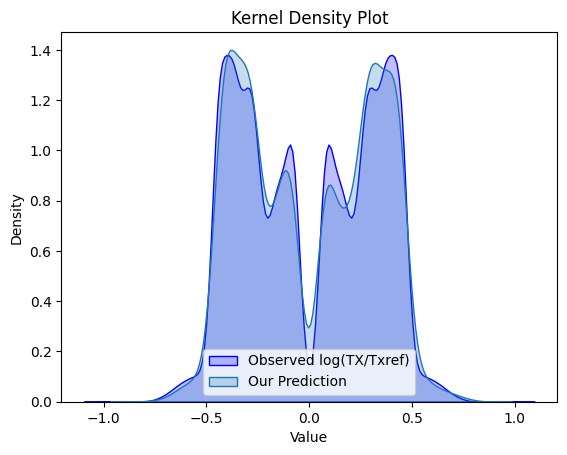

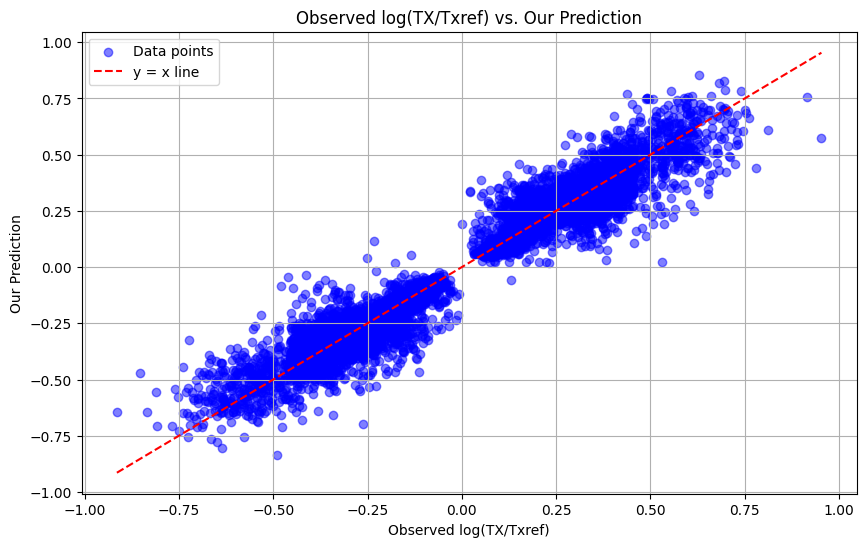

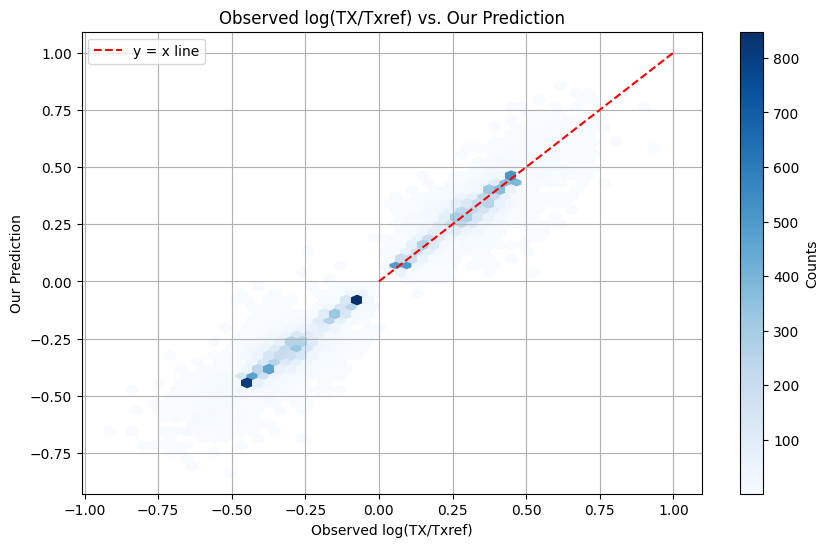

In [12]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [13]:
loss

0.0028945566155016422

In [14]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE:  0.002894557530563644
RMSE:  0.05380109228039561
MAE:  0.03353517094172329
R2:  0.9719168439522645


In [15]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)